In [31]:
from typing import NewType
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [37]:
class Calibration:
    def __init__(self, mtx, dist):
        self.mtx = mtx
        self.dist = dist
        
    def __repr__(self):
        return 'Calibration({self.mtx}, {self.dist})'.format(self=self)

def calibrate_camera():
    # size of the board: 10x7, but the code wants the corners
    width = 9
    height = 6
    
    images = glob.glob("camera_cal/calibration*.jpg")
    
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image space
    
    # Prepare obj points
    objp = np.zeros((width*height, 3), np.float32)
    objp[:,:2] = np.mgrid[0:width,0:height].T.reshape(-1,2) # x,y coordinates

    shape = None
    
    for fname in images:
        
        # Read in the image in BGR
        img = mpimg.imread(fname)
        
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        shape = gray.shape[::-1]
        
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (width, height), None)

        # If corners are found, collect them
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
            
            # Draw and display the corners
            img = cv2.drawChessboardCorners(img, (width, height), corners, ret)
            
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, shape, None, None)
    return Calibration(mtx, dist)

def undistort_img(calibration, img):
    undist = cv2.undistort(img, calibration.mtx, calibration.dist, None, calibration.mtx)
    return undist

camera_calibration = calibrate_camera()

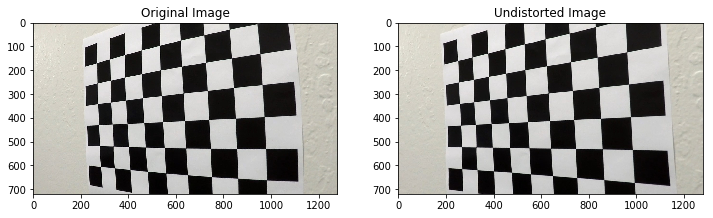

In [43]:
# Example image
def example_image_undistort():
    fig_size = [12, 9]
    plt.rcParams["figure.figsize"] = fig_size
    
    img = mpimg.imread("camera_cal/calibration4.jpg")
    undist = undistort_img(camera_calibration, img)
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.title('Undistorted Image')
    plt.imshow(undist)

example_image_undistort()